In [1]:
import pandas as pd
#from PIL import Image
#import cv2
import glob
import numpy as np
import os
#from scipy.misc import imread
import matplotlib.pyplot as plt
%pylab inline
from IPython import display



Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('groundtruth_dataframe_062418.csv')
#address = df['Address_lookup']
#our_images = [i.split('/')[-1] for i in glob.glob('google_street_image/DOF_groundtruths/*.jpg')]
#files = glob.glob(myloc+'/*.jpg')

In [3]:
df.head()

,Unnamed: 0,Address,Borough,GT,DOF_Proximity_decode,PLUTO_Proximity,GT_Proximity,screen_result
0,0,"193 MANHATTAN STREET, Staten Island, New York,...",SI,N,Detached,Detached,Detached,tree
1,1,"189 MANHATTAN STREET, Staten Island, New York,...",SI,N,Detached,Detached,Detached,y
2,2,"181 MANHATTAN STREET, Staten Island, New York,...",SI,N,Detached,Detached,Detached,n
3,3,"179 MANHATTAN STREET, Staten Island, New York,...",SI,N,Detached,Detached,Detached,tree
4,4,"175 MANHATTAN STREET, Staten Island, New York,...",SI,N,Detached,Detached,Detached,y


In [4]:
df['StreetView_Proximity'] = df.GT_Proximity

In [5]:
df.head()

,Unnamed: 0,Address,Borough,GT,DOF_Proximity_decode,PLUTO_Proximity,GT_Proximity,screen_result,StreetView_Proximity
0,0,"193 MANHATTAN STREET, Staten Island, New York,...",SI,N,Detached,Detached,Detached,tree,Detached
1,1,"189 MANHATTAN STREET, Staten Island, New York,...",SI,N,Detached,Detached,Detached,y,Detached
2,2,"181 MANHATTAN STREET, Staten Island, New York,...",SI,N,Detached,Detached,Detached,n,Detached
3,3,"179 MANHATTAN STREET, Staten Island, New York,...",SI,N,Detached,Detached,Detached,tree,Detached
4,4,"175 MANHATTAN STREET, Staten Island, New York,...",SI,N,Detached,Detached,Detached,y,Detached


In [6]:
# attached sample 150
df_att = df[(df.screen_result == 'y') & (df.DOF_Proximity_decode == 'Attached')].sample(150)

In [7]:
# semi sample 150
df_semi = df[(df.screen_result == 'y') & (df.DOF_Proximity_decode == 'Semi-Attached')].sample(150)

In [8]:
# det sample 150
df_det = df[(df.screen_result == 'y') & (df.DOF_Proximity_decode == 'Detached')].sample(150)

# Attached 

In [ ]:
df_att.head()

In [ ]:
df_att.loc[573, 'StreetView_Proximity'] = 'A'

In [ ]:
# parse through the dataframe with address and lookup in the images datasets 
# pull up the image for that address if found if not returned missing

loc = "/projects/18_property_vtmfid/shared/google_street_image/DOF_groundtruths/"
for home in df_att.index:
    Add = df_att.loc[home].Address
    path = loc + Add + '.jpg'
    #print (path)
    if [Add] not in [x.split('.')[:-1] for x in os.listdir(loc)]:
        print ('missing')
    else:
        plt.figure(figsize=(5,5))
        plt.imshow(imread(path))
        plt.show()
        label = input("Proximity: 'A', 'S', or 'D' ?")
        df_att.loc[home, 'StreetView_Proximity'] = label
        display.clear_output(wait=True)

In [13]:
df_att = pd.read_csv('attached_screen_07152018.csv')
df_att.head()

,Unnamed: 0,Unnamed: 0.1,Address,Borough,GT,DOF_Proximity_decode,PLUTO_Proximity,GT_Proximity,screen_result,StreetView_Proximity
0,824,824,"475 EAST 144 STREET, Bronx, New York, 10454",BX,N,Attached,Attached,Attached,y,A
1,548,548,"500 EAST 147 STREET, Bronx, New York, 10455",BX,Y,Attached,Attached,Semi-Attached,y,S
2,930,930,"312 ALEXANDER AVENUE, Bronx, New York, 10454",BX,N,Attached,Attached,Attached,y,A
3,853,853,"446 EAST 146 STREET, Bronx, New York, 10455",BX,Y,Attached,Attached,Semi-Attached,y,S
4,937,937,"337 EAST 140 STREET, Bronx, New York, 10454",BX,N,Attached,Attached,Attached,y,S


In [14]:
df_att.groupby('StreetView_Proximity').count()

,Unnamed: 0,Unnamed: 0.1,Address,Borough,GT,DOF_Proximity_decode,PLUTO_Proximity,GT_Proximity,screen_result
StreetView_Proximity,,,,,,,,,
?,3,3,3,3,3,3,3,3,3
A,124,124,124,124,124,124,124,124,124
D,2,2,2,2,2,2,2,2,2
S,21,21,21,21,21,21,21,21,21


# Detached

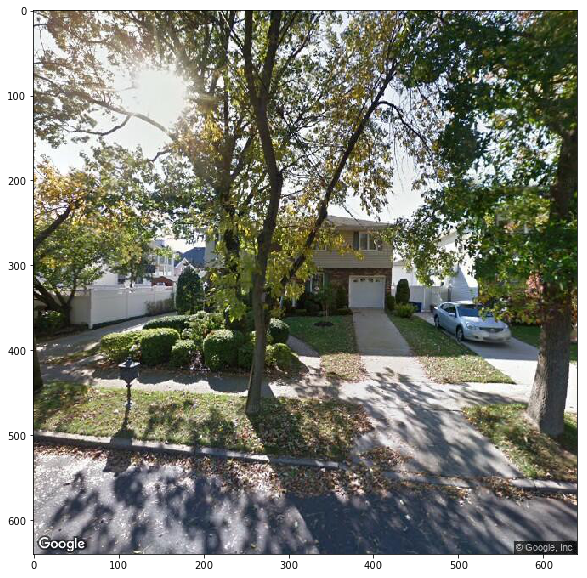

Proximity: 'A', 'S', or 'D' ?tree


In [9]:
# parse through the dataframe with address and lookup in the images datasets 
# pull up the image for that address if found if not returned missing

loc = "/projects/18_property_vtmfid/shared/google_street_image/DOF_groundtruths/"
for home in df_det.index:
    Add = df_det.loc[home].Address
    path = loc + Add + '.jpg'
    #print (path)
    if [Add] not in [x.split('.')[:-1] for x in os.listdir(loc)]:
        print ('missing')
    else:
        plt.figure(figsize=(20,10))
        plt.imshow(imread(path))
        plt.show()
        label = input("Proximity: 'A', 'S', or 'D' ?")
        df_det.loc[home, 'StreetView_Proximity'] = label
        display.clear_output(wait=True)

In [12]:
df_det.groupby('StreetView_Proximity').count()

,Unnamed: 0,Address,Borough,GT,DOF_Proximity_decode,PLUTO_Proximity,GT_Proximity,screen_result
StreetView_Proximity,,,,,,,,
A,1,1,1,1,1,1,1,1
D,146,146,146,146,146,146,146,146
S,2,2,2,2,2,2,2,2
tree,1,1,1,1,1,1,1,1


# Semi-attached

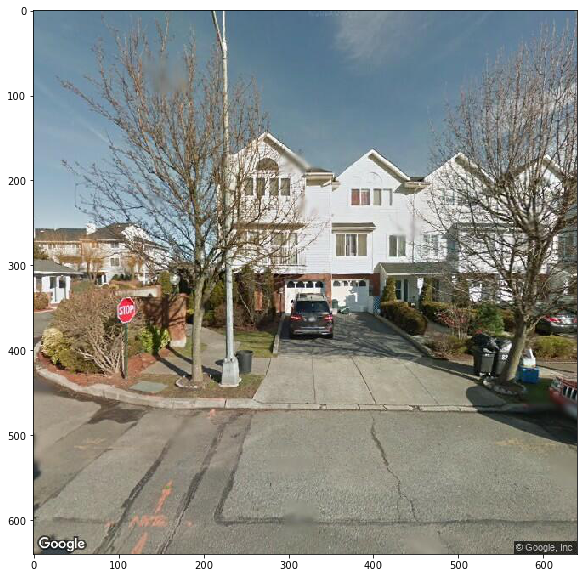

Proximity: 'A', 'S', or 'D' ?S


In [15]:
# parse through the dataframe with address and lookup in the images datasets 
# pull up the image for that address if found if not returned missing

loc = "/projects/18_property_vtmfid/shared/google_street_image/DOF_groundtruths/"
for home in df_semi.index:
    Add = df_semi.loc[home].Address
    path = loc + Add + '.jpg'
    #print (path)
    if [Add] not in [x.split('.')[:-1] for x in os.listdir(loc)]:
        print ('missing')
    else:
        plt.figure(figsize=(10,10))
        plt.imshow(imread(path))
        plt.show()
        label = input("Proximity: 'A', 'S', or 'D' ?")
        df_semi.loc[home, 'StreetView_Proximity'] = label
        display.clear_output(wait=True)

In [16]:
df_semi.groupby('StreetView_Proximity').count()

,Unnamed: 0,Address,Borough,GT,DOF_Proximity_decode,PLUTO_Proximity,GT_Proximity,screen_result
StreetView_Proximity,,,,,,,,
?,4,4,4,4,4,4,4,4
A,64,64,64,64,64,64,64,64
D,20,20,20,20,20,20,20,20
S,59,59,59,59,59,59,59,59
tree,3,3,3,3,3,3,3,3
